In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt


#create 3d array to hold data [ [ [x_p1_t0, x_p2_t0, x_p3_t0, ...],[y_p1_t0, y_p2_t0, ...], ... ],
#                              [ [x_p1_t1, x_p2_t1, x_p3_t1, ...],[y_p1_t1, y_p2_t1, ...], ... ],
#                                 . . .
#                              [ [x_p1_tn, x_p2_tn, x_p3_tn, ...],[y_p1_tn, y_p2_tn, ...], ... ] ]



#Open the binary file for reading
f = open("output.dat", "rb")


########## read number of particles (first number in data file) ##########
char_len = 1
char_empty = False
while not char_empty:
    f.seek(0)  #go to first character in file
    data_byte = f.read(char_len)
    num_particles = int(data_byte)
    char_len+=1
    next_char = f.read(1)
    if next_char ==  b" ":
        char_empty = True
        
print("Num particles: " + str(num_particles))

########## read number of timesteps ##########
steps = float(f.read(12))  #non-negative number in scientific notation has 12 characters
steps = int(steps)
print("Number of steps: " + str(steps))

f.read(1)  #read and ignore space

########## read duration ##########
duration = float(f.read(12))
print("Simulation duration: " + str(duration))

f.read(1)

########## read timestep ##########
dt = float(f.read(12))
print("Timestep: " + str(dt))

f.read(1)

########## read axial magnetic field ##########
data_byte = f.read(13) 
if float(data_byte) >= 0:  #if value is non-negative, only read 12 characters
    f.seek(-13,1)
    data_byte = f.read(12)
    Bz = float(data_byte)
else:  #if value is negative, read 13 characters
    Bz = float(data_byte)
f.read(1)

########## read k_z ##########
data_byte = f.read(13)
if float(data_byte) >= 0:
    f.seek(-13,1)
    data_byte = f.read(12)
    kz = float(data_byte)
else:
    kz = float(data_byte)
f.read(1)

########## read delta ##########
data_byte = f.read(13)
if float(data_byte) >= 0:
    f.seek(-13,1)
    data_byte = f.read(12)
    delta = float(data_byte)
else:
    delta = float(data_byte)
f.read(1)

########## read omega_R ##########
data_byte = f.read(13)
if float(data_byte) >= 0:
    f.seek(-13,1)
    data_byte = f.read(12)
    omegaR = float(data_byte)
else:
    omegaR = float(data_byte)
f.read(1)

########## read phi_0 ##########
data_byte = f.read(13)
if float(data_byte) >= 0:
    f.seek(-13,1)
    data_byte = f.read(12)
    phi0 = float(data_byte)
else:
    phi0 = float(data_byte)
f.read(1)

print("Bz: " + str(Bz))
print("kz: " + str(kz))
print("delta: " + str(delta))
print("phi0: " + str(phi0))

########## read charges ##########
charges = np.array([])
for i in range(num_particles):
    data_byte = f.read(13)
    if float(data_byte) >= 0:
        f.seek(-13,1)
        data_byte = f.read(12)
        this_charge = float(data_byte)
        charges = np.append(charges, this_charge)
    else:
        this_charge = float(data_byte)
        charges = np.append(charges, this_charge)
    f.read(1)
    
########## read masses ##########
masses = np.array([])
for i in range(num_particles):
    data_byte = f.read(13)
    if float(data_byte) >= 0:
        f.seek(-13,1)
        data_byte = f.read(12)
        this_mass = float(data_byte)
        masses = np.append(masses, this_mass)
    else:
        this_mass = float(data_byte)
        masses = np.append(masses, this_mass)
        print("ERROR: NEGATIVE MASS")
    f.read(1)

print("Charges:")
print(charges)
print("Masses:")
print(masses)


############################## READ POS. & VEL. AT EACH TIMESTEP ##############################

time_counter = 0  #outermost index of data array, indexes timestep
type_counter = 0  #middle index which tells us to go to i.e. x positions array, or y velocities array, etc
val_counter = 0  #innermost index, indexes particle

data = np.zeros((steps,6,num_particles))

while time_counter < steps:
    #read data for this timestep
    type_array = np.zeros((6, num_particles))  #has form [ [x_p1_t0, x_p2_t0, x_p3_t0, ...],[y_p1_t0, y_p2_t0, ...], ... ]
    while type_counter < 6:
        #for this data type, i.e. y-velocities, read data for each particle
        val_array = np.array([])  #has form [x_p1_t0, x_p2_t0, x_p3_t0, ...]
        while val_counter < num_particles:
            data_byte = f.read(13)
            #print(data_byte)
            if float(data_byte) >= 0 and str(float(data_byte))[0] != '-': #second coniditon is for -0.0e00
                #print(str(float(data_byte)))
                f.seek(-13,1)
                data_byte = f.read(12)
            
            this_val = float(data_byte)
            val_array = np.append(val_array, this_val)

            f.seek(1,1) #skip the space between values
            val_counter+=1
            
        type_array[type_counter] = val_array
        val_counter = 0
        type_counter+=1
    data[time_counter] = type_array
    type_counter=0
    time_counter+=1
    
print(data)


Num particles: 6
Number of steps: 500000
Simulation duration: 0.0005
Timestep: 1e-09
Bz: 4.4588
kz: 1580000.0
delta: 0.0
phi0: 0.0
Charges:
[  1.60217700e-19   1.60217700e-19   1.60217700e-19   1.60217700e-19
   1.60217700e-19   1.60217700e-19]
Masses:
[  1.49653600e-26   1.49653600e-26   1.49653600e-26   1.49653600e-26
   1.49653600e-26   1.49653600e-26]
[[[  7.96922900e-12  -2.81309100e-06  -2.70289200e-06   7.18631400e-06
    -8.92475800e-06   7.25441800e-06]
  [  2.40097000e-13   8.47774500e-06  -8.51358000e-06   5.29741800e-06
    -5.79760700e-08  -5.20360900e-06]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [ -4.81477000e-07  -9.51143300e+00   9.69730800e+00  -6.17902600e+00
     3.00738000e-01   5.69241500e+00]
  [  9.00427100e-06  -3.40409400e+00  -2.83173800e+00   7.98577900e+00
    -1.00894700e+01   8.33950500e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00

0.0


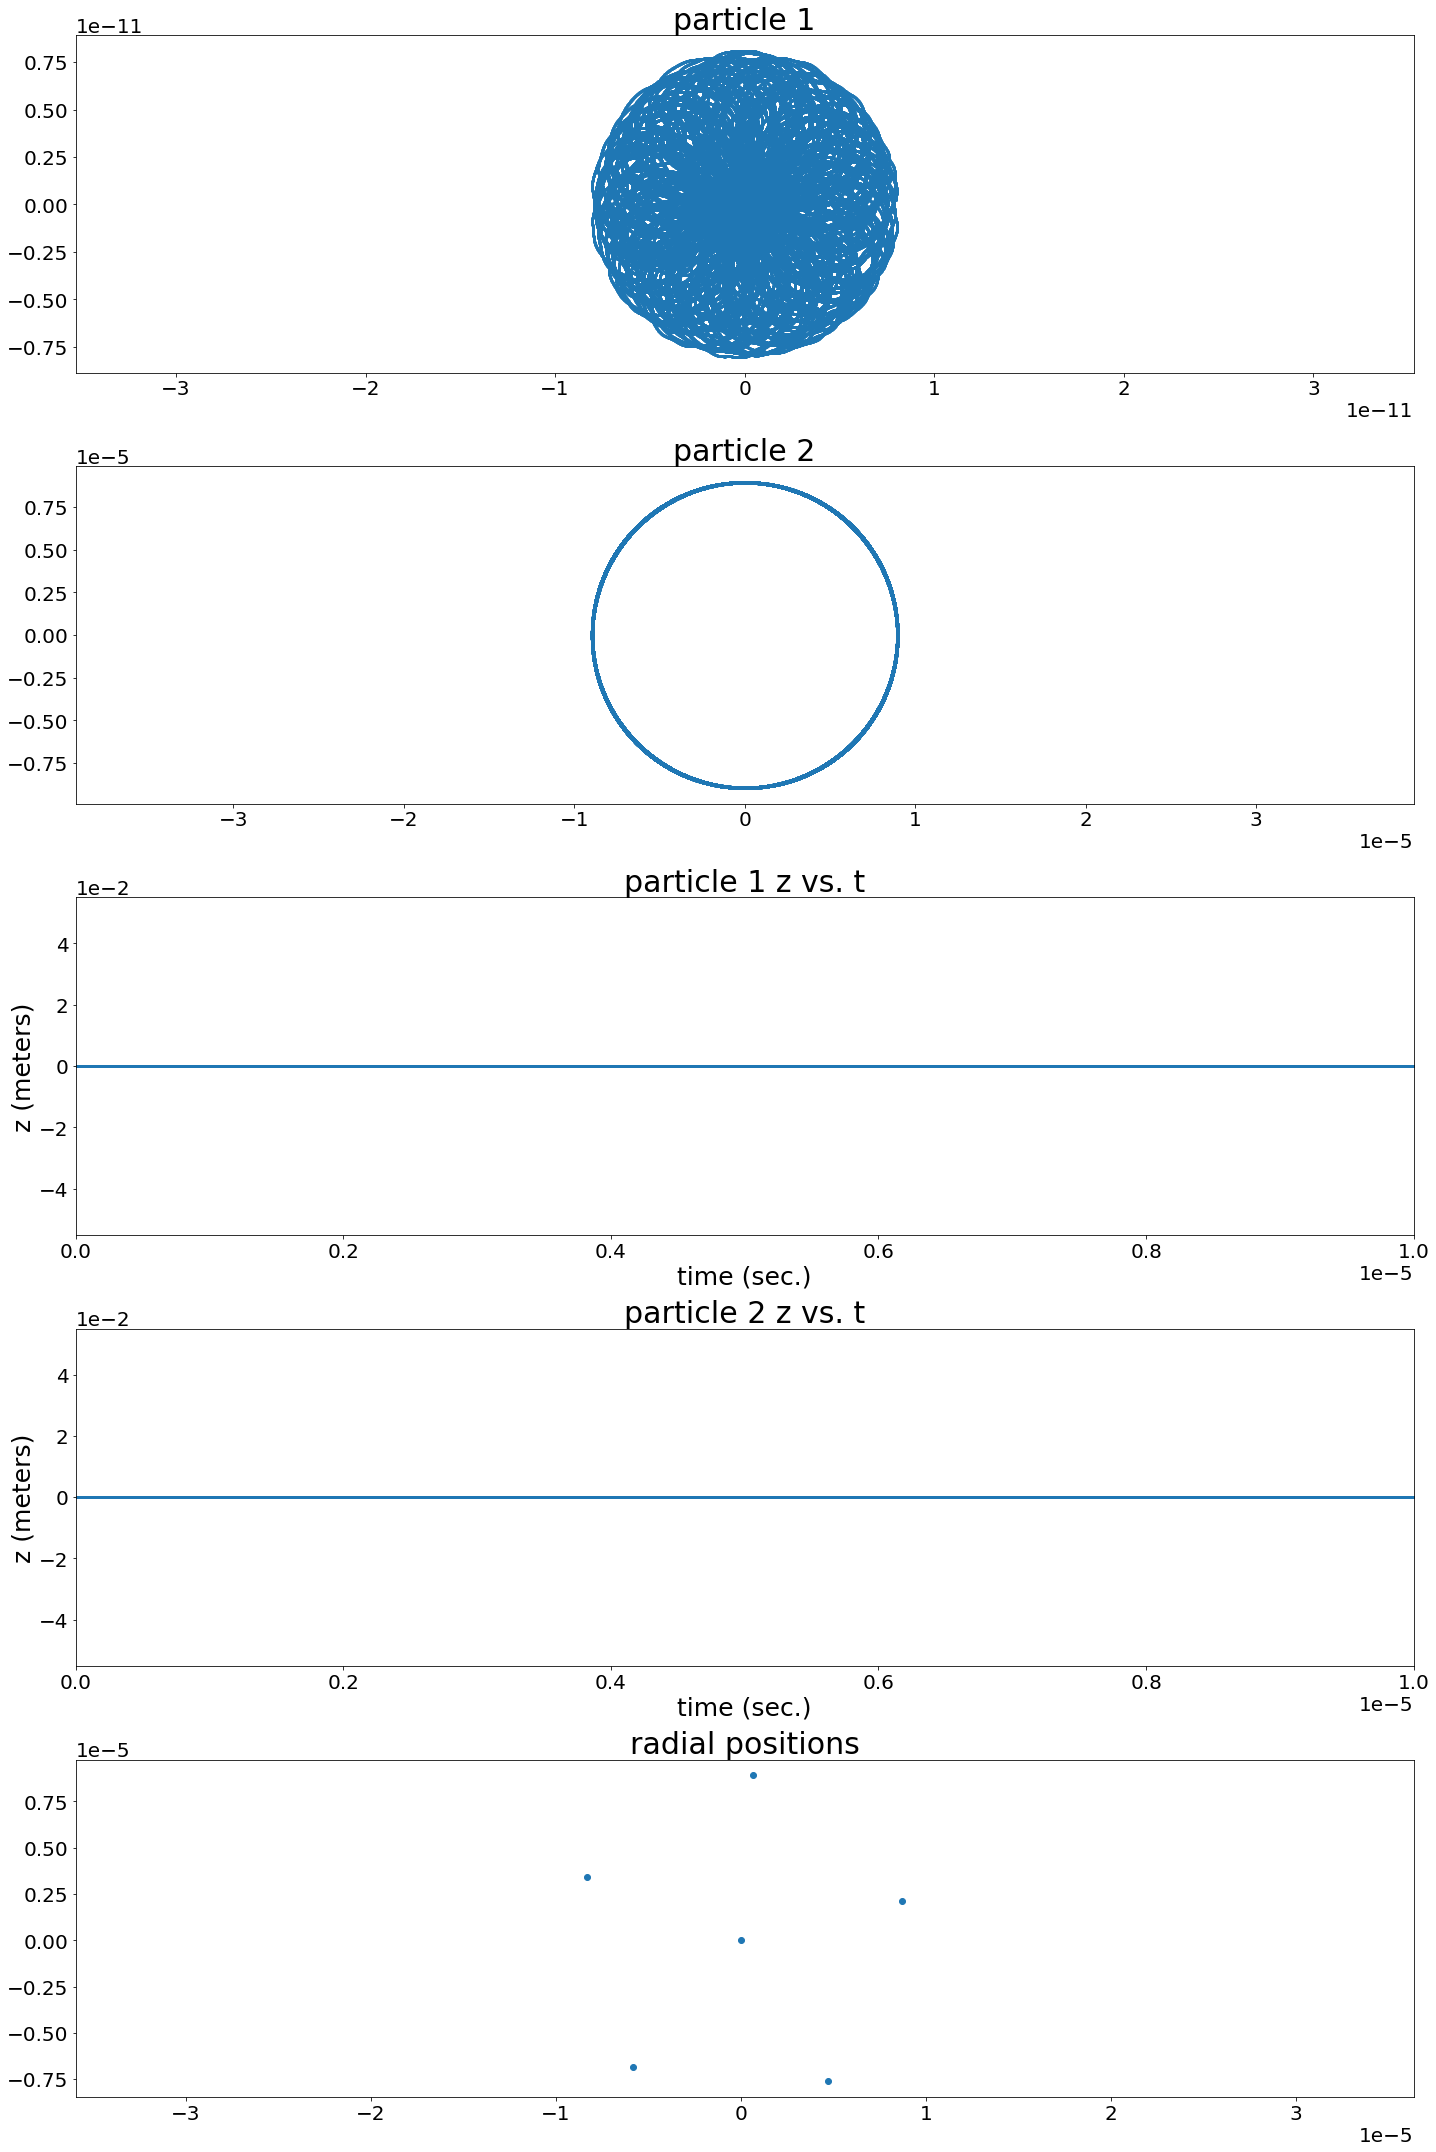

In [3]:
%matplotlib inline

f, axs = plt.subplots(5,1,figsize=(20,30))

time = 10500
axs[4].plot(data[time, 0, :], data[time, 1, :], 'o')
axs[4].axis('equal')
axs[4].set_title('radial positions', fontsize=30)
axs[4].tick_params(axis='both', labelsize=20)
axs[4].xaxis.offsetText.set_fontsize(20)
axs[4].yaxis.offsetText.set_fontsize(20)
axs[4].ticklabel_format(style='sci', scilimits = (0,0))

#plot y vs x for particle 1
axs[0].plot(data[:, 0, 0], data[:, 1, 0], '.', ms=3)
axs[0].axis('equal')
axs[0].set_title('particle 1', fontsize=30)
axs[0].tick_params(axis='both', labelsize=20)
axs[0].xaxis.offsetText.set_fontsize(20)
axs[0].yaxis.offsetText.set_fontsize(20)
axs[0].ticklabel_format(style='sci', scilimits = (0,0))

#plot y vs x for particle 2
axs[1].plot(data[:, 0, 1], data[:, 1, 1], '.', ms=3)
axs[1].axis('equal')
axs[1].set_title('particle 2', fontsize=30)
axs[1].tick_params(axis='both', labelsize=20)
axs[1].xaxis.offsetText.set_fontsize(20)
axs[1].yaxis.offsetText.set_fontsize(20)
axs[1].ticklabel_format(style='sci', scilimits = (0,0))

#plot z vs t for particle 1
axs[2].plot(dt*np.arange(len(data[:, 2, 0])), data[:, 2, 0], '.', ms=3)
#axs[2].axis('equal')
axs[2].set_xlim(0,1e-05)
axs[2].set_title('particle 1 z vs. t', fontsize=30)
axs[2].set_xlabel('time (sec.)', fontsize=25)
axs[2].set_ylabel('z (meters)', fontsize=25)
axs[2].tick_params(axis='both', labelsize=20)
axs[2].xaxis.offsetText.set_fontsize(20)
axs[2].yaxis.offsetText.set_fontsize(20)
axs[2].ticklabel_format(style='sci', scilimits = (0,0))
print(min(data[:, 2, 0]))

#plot z vs t for particle 2
axs[3].plot(dt*np.arange(len(data[:, 2, 1])), data[:, 2, 1], '.', ms=3)
#axs[2].axis('equal')
axs[3].set_xlim(0,1e-05)
axs[3].set_title('particle 2 z vs. t', fontsize=30)
axs[3].set_xlabel('time (sec.)', fontsize=25)
axs[3].set_ylabel('z (meters)', fontsize=25)
axs[3].tick_params(axis='both', labelsize=20)
axs[3].xaxis.offsetText.set_fontsize(20)
axs[3].yaxis.offsetText.set_fontsize(20)
axs[3].ticklabel_format(style='sci', scilimits = (0,0))

f.tight_layout()

plt.show()

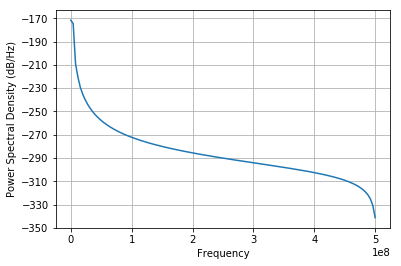

In [5]:
plt.psd(data[:, 0, 3], Fs=10**9)
plt.show()

<IPython.core.display.Javascript object>


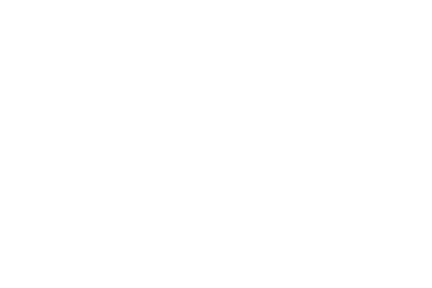

<IPython.core.display.Javascript object>


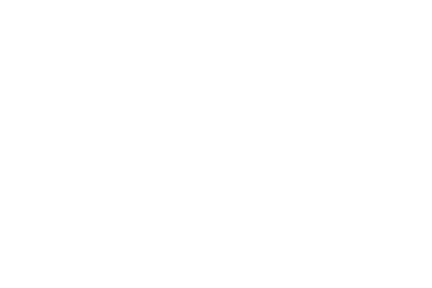

Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [10]:
%matplotlib notebook
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# creating a blank window
# for the animation
fig = plt.figure()
xmin = -0.3*10**-8-4*10**-3
xmax = 0.3*10**-8-4*10**-3
ymin = 0*10**-9
ymax = 4.2*10**-9
axis = plt.axes(xlim =(xmin,xmax),
                ylim =(ymin,ymax))
 
line, = axis.plot([], [], lw = 0.1)
 
# what will our line dataset
# contain?
def init():
    line.set_data([], [])
    return line,
 
# initializing empty values
# for x and y co-ordinates
xdata, ydata = [], []

# animation function
def animate(i):
    x = data[i,0,0]
    y = data[i,1,0]     
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
     
    return line,

# calling the animation function    
anim = animation.FuncAnimation(fig, animate,
                            init_func = init,
                            frames = 200,
                            interval = 100,
                            blit = True)
 
# saves the animation in our desktop
#anim.save('growingCoil.mp4', writer = 'ffmpeg', fps = 30)

<IPython.core.display.Javascript object>


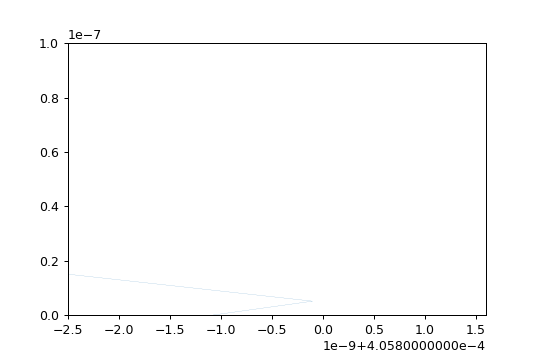

In [300]:
%matplotlib notebook
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# creating a blank window
# for the animation
fig = plt.figure()
xmin = -2.5*10**-9+4.058*10**-4
xmax = 1.6*10**-9+4.058*10**-4
ymin = 0
ymax = 1*10**-7
axis = plt.axes(xlim =(xmin,xmax),
                ylim =(ymin,ymax))
 
line, = axis.plot([], [], lw = 0.1)
 
# what will our line dataset
# contain?
def init():
    line.set_data([], [])
    return line,
 
# initializing empty values
# for x and y co-ordinates
xdata, ydata = [], []

# animation function
def animate(i):
    x = data[i,0,1]
    y = data[i,1,1]     
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
     
    return line,

# calling the animation function    
anim = animation.FuncAnimation(fig, animate,
                            init_func = init,
                            frames = 200,
                            interval = 20,
                            blit = True)
 
# saves the animation in our desktop
#anim.save('growingCoil.mp4', writer = 'ffmpeg', fps = 30)